In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

%matplotlib inline

In [9]:
#infile = '../data/BEA-RegionalIncomeByIndustry/CA5_1969_2000_MSA.csv'
infile = '../data/BEA-RegionalIncomeByIndustry/CA5N_2001_2013_MSA.csv'

df = pd.read_csv(infile)

df

,GeoFIPS,GeoName,Region,Table,LineCode,IndustryClassification,Description,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,10,...,Personal income,3826121,3957936,4181505,4363728,4588171,4863397,5211004,5811434,5465772,5685546,6111898,6546641,6743442
1,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,20,...,Population (persons) 2/,158917,159012,158810,160156,160761,161389,162023,162508,163888,165627,166571,167422,167501
2,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,30,...,Per capita personal income (dollars),24076,24891,26330,27247,28540,30135,32162,35761,33351,34327,36692,39103,40259
3,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,35,...,Earnings by place of work,2624485,2735248,2881425,3049622,3149056,3371812,3530409,3826303,3566446,3702008,3922694,4193297,4375425
4,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,36,...,less: Contributions for government social in...,250336,265072,281431,297861,310484,329193,350931,372128,370740,379585,352407,370810,428819
5,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,37,...,Employee and self-employed contributions f...,130043,137857,142218,150841,158189,168976,180966,194843,192634,193711,160014,167408,221904
6,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,38,...,Employer contributions for government soci...,120293,127215,139213,147020,152295,160217,169965,177285,178106,185874,192393,203402,206915
7,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,42,...,plus: Adjustment for residence 4/,13140,7951,7293,8016,9562,9925,9082,10613,8354,13303,20459,28918,31971
8,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,45,...,equals: Net earnings by place of residence,2387289,2478127,2607287,2759777,2848134,3052544,3188560,3464788,3204060,3335726,3590746,3851405,3978577
9,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5N,46,...,"plus: Dividends, interest, and rent 5/",785508,775721,822123,811404,881822,907077,1035267,1288693,1099046,1101442,1240650,1394588,1417406


In [2]:
infile = '../data/cleaned_data/regional_income_details_01-13.csv'

df = pd.read_csv(infile)

df.drop('Unnamed: 0', axis=1, inplace=True)

df

,line_id,line_desc,GeoFips,GeoName,CL_UNIT,UNIT_MULT,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,10,[CA5N] Personal income,10180,"Abilene, TX (Metropolitan Statistical Area)",thousands of dollars,3,3826121,3957936,4181505,4363728,4588171,4863397,5211004,5811434,5465772,5685546,6111898,6546641,6743442
1,10,[CA5N] Personal income,10420,"Akron, OH (Metropolitan Statistical Area)",thousands of dollars,3,20950429,21315035,22169663,22995085,23893569,25196505,26324506,26969414,26260437,26761719,28337002,29606464,30153560
2,10,[CA5N] Personal income,10500,"Albany, GA (Metropolitan Statistical Area)",thousands of dollars,3,3741744,3858145,4002073,4119900,4271892,4394788,4595837,4767476,4735401,4825885,5195453,5279385,5317564
3,10,[CA5N] Personal income,10540,"Albany, OR (Metropolitan Statistical Area)",thousands of dollars,3,2536579,2581851,2640428,2791265,2882484,3098406,3264599,3383329,3367677,3406222,3533978,3678060,3739110
4,10,[CA5N] Personal income,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",thousands of dollars,3,27850424,27873102,29204625,30886431,32350939,34231376,35908682,37679534,38153957,39524410,40874198,42740725,43626120
5,10,[CA5N] Personal income,10740,"Albuquerque, NM (Metropolitan Statistical Area)",thousands of dollars,3,21530144,22097811,22717760,23876115,25563674,27559229,28949391,30181604,29926084,30387940,31832781,32784577,32759375
6,10,[CA5N] Personal income,10780,"Alexandria, LA (Metropolitan Statistical Area)",thousands of dollars,3,3676855,3802040,3881985,4182037,4544138,4840263,5130556,5571406,5557503,5562930,5564112,5888429,5962572
7,10,[CA5N] Personal income,10900,"Allentown-Bethlehem-Easton, PA-NJ (Metropolita...",thousands of dollars,3,23701021,24423010,25316995,26332077,27482828,29373665,31254008,32278321,31879360,32608606,34232344,35624976,36238500
8,10,[CA5N] Personal income,11020,"Altoona, PA (Metropolitan Statistical Area)",thousands of dollars,3,3255197,3326750,3438173,3588078,3725236,3876806,4092447,4200587,4244604,4358607,4597894,4758635,4821242
9,10,[CA5N] Personal income,11100,"Amarillo, TX (Metropolitan Statistical Area)",thousands of dollars,3,5897163,6025140,6348616,6625023,7129790,7644371,8110079,8882025,8584786,9022207,9616582,10123437,10327233


In [8]:
#look at personal income per capita
pipc_df = df[df['LineCode']==400]

pipc_df

,GeoFIPS,GeoName,Region,Table,LineCode,IndustryClassification,Description,1969,1970,1971,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
35,10180,"Abilene, TX (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,30607,31485,33877,...,168086,185028,172883,180286,196244,235405,259446,275008,281458,256299
148,10420,"Akron, OH (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,1060286,1055453,1064668,...,2694379,2814186,2931552,3066992,3181685,3210759,3261081,3452201,3525160,3550144
261,10500,"Albany, GA (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,55560,62238,70818,...,334435E,344168,367097,397446,403805,426007,445291,458972,446298,464784
374,10540,"Albany, OR (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,88042,93295,104284,...,387043,413382,425603,465909,484734,522609,571677,550060,531039,519179
487,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",NaN,CA5,400,D,Manufacturing,607201,635447,676356,...,1839149,1950834,1962203,1946153,1859729,1823878,1883775,1894562,1942989,2063389
600,10740,"Albuquerque, NM (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,73066,79484,89025,...,839612,869116,964481,1111113,1174515,1229029,1365433,(D),(D),(D)
713,10780,"Alexandria, LA (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,32472,33824,34014,...,147687,160447,175372,174055,178132,181415,178187,178220,199892,207283
826,10900,"Allentown-Bethlehem-Easton, PA-NJ (Metropolita...",NaN,CA5,400,D,Manufacturing,956379,996610,1003265,...,2851903,3097339,3161118,3248094,3343038,3210122,3359848,3379788,3540093,3675932
939,11020,"Altoona, PA (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,114165,117768,116559,...,290366,304083,324314,344225,351646,356851,373991,385914,417885,430935
1052,11100,"Amarillo, TX (Metropolitan Statistical Area)",NaN,CA5,400,D,Manufacturing,61112E,67301E,75993E,...,353056E,370865E,398580E,431836E,458416E,476796,471859,(D),(D),(D)


In [ ]:
# construct a relative dataframe
int_df = pipc_df[]

In [111]:
relative_df = pipc_df

means_df = raw_df.mean()

for year in raw_df.columns:
    relative_df[year] = int_df[year]/means_df[year]-1
    
print relative_df

      line_id                                    line_desc  GeoFips  \
762        30  [CA5N] Per capita personal income (dollars)    10180   
763        30  [CA5N] Per capita personal income (dollars)    10420   
764        30  [CA5N] Per capita personal income (dollars)    10500   
765        30  [CA5N] Per capita personal income (dollars)    10540   
766        30  [CA5N] Per capita personal income (dollars)    10580   
767        30  [CA5N] Per capita personal income (dollars)    10740   
768        30  [CA5N] Per capita personal income (dollars)    10780   
769        30  [CA5N] Per capita personal income (dollars)    10900   
770        30  [CA5N] Per capita personal income (dollars)    11020   
771        30  [CA5N] Per capita personal income (dollars)    11100   
772        30  [CA5N] Per capita personal income (dollars)    11180   
773        30  [CA5N] Per capita personal income (dollars)    11260   
774        30  [CA5N] Per capita personal income (dollars)    11460   
775   

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [119]:
#consider one case to start modeling:

abilene_pipc = relative_df[relative_df['GeoFips']==relative_df['GeoFips'].iloc[150]]
abilene_pipc

,line_id,line_desc,GeoFips,GeoName,CL_UNIT,UNIT_MULT,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
912,30,[CA5N] Per capita personal income (dollars),25540,"Hartford-West Hartford-East Hartford, CT (Metr...",dollars,0,0.391363,0.360951,0.347468,0.357584,0.358028,0.368762,0.401131,0.380243,0.395059,0.38903,0.356142,0.374209,0.366355


In [120]:
# prepare data windows for model:
raw_df = abilene_pipc.drop(['line_id','line_desc','GeoFips','GeoName','CL_UNIT','UNIT_MULT'],axis=1)
years = raw_df.columns.values
values = raw_df.values[0]

In [121]:
window = 4
datapoints = len(values)

a = 0
b = window
x = []
y = []
while b < datapoints:
    x.append(values[a:b])
    a += 1
    b += 1

b = window
while b < datapoints:
    y.append(values[b])
    b += 1
    
    
print len(x), x
print len(y), y

9 [array([ 0.39136284,  0.36095108,  0.3474677 ,  0.35758406]), array([ 0.36095108,  0.3474677 ,  0.35758406,  0.35802809]), array([ 0.3474677 ,  0.35758406,  0.35802809,  0.36876203]), array([ 0.35758406,  0.35802809,  0.36876203,  0.40113055]), array([ 0.35802809,  0.36876203,  0.40113055,  0.3802432 ]), array([ 0.36876203,  0.40113055,  0.3802432 ,  0.39505914]), array([ 0.40113055,  0.3802432 ,  0.39505914,  0.38902966]), array([ 0.3802432 ,  0.39505914,  0.38902966,  0.35614205]), array([ 0.39505914,  0.38902966,  0.35614205,  0.37420906])]
9 [0.35802809498979404, 0.36876203125213425, 0.40113055197516001, 0.38024320314760063, 0.39505914341836657, 0.38902966369231695, 0.3561420494160199, 0.37420906199378989, 0.36635534786571911]


[ 0.3786363  0.3786363  0.3786363  0.3786363  0.3786363  0.3786363
  0.3786363  0.3786363  0.3786363]
[0.35802809498979404, 0.36876203125213425, 0.40113055197516001, 0.38024320314760063, 0.39505914341836657, 0.38902966369231695, 0.3561420494160199, 0.37420906199378989, 0.36635534786571911]


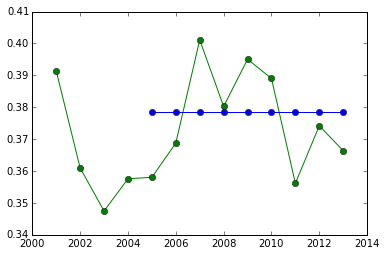

In [135]:
#windowed svr
save_for_test = 2

svr_rbf = SVR(kernel='rbf', C=1e20, gamma=1e-1)
y_rbf = svr_rbf.fit(x[:-save_for_test], y[:-save_for_test]).predict(x)

print y_rbf
print y

plt.plot(years, values, '-o', color='green')
plt.plot(years[window:], y_rbf, '-o', color='blue')

#plt.ylim(-.5,.5)
plt.show()
